# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Crypto Analyst Lark Davis Says These 5 Low Market Cap Gems Could Deliver 100x Gains.  In a recent video for his very popular YouTube channel, popular New Zealand-based crypto analyst Lark Davis (@TheCryptoLark on Twitter) talked about five low-cap altcoins that could deliver 100x gains. The first three are projects that Davis has mentioned in several previous videos, but the last two projects he talks about in this video for the first […] ... [| Skaityti daugiau](https://www.cryptoglobe.com/latest/2021/02/crypto-analyst-lark-davis-says-these-5-low-market-cap-gems-could-deliver-100x-gains/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- The National for February 18, 2021.  The National for February 18: What NASA’s mission to Mars means for space exploration and the key roles some Canadians played. Plus, Who’s tracking private COVID-19 tests? ... [| Skaityti daugiau](http://www.cbc.ca/player/play/978965571558) 

### Kainų kaita pandemijos metu

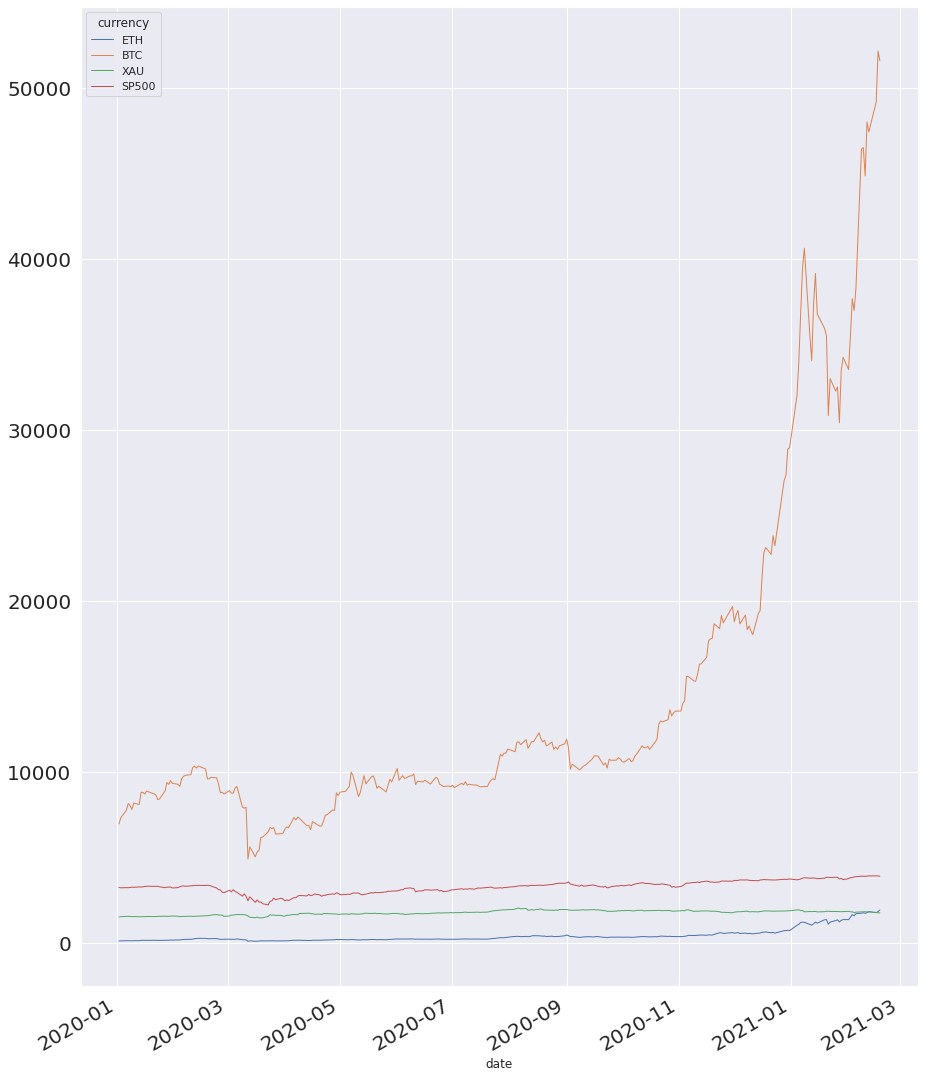

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.979712,0.378373,0.741911
BTC,0.979712,1.000000,0.343937,0.755106
XAU,0.378373,0.343937,1.000000,0.559667
SP500,0.741911,0.755106,0.559667,1.000000


In [8]:
#hide ### Koreliacijos matrica.

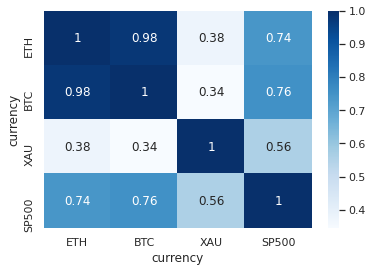

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')